In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use("default")
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.shape, test.shape

((28322, 36), (85065, 35))

In [4]:
df_train = train.copy()
df_test = test.copy()

In [5]:
drop_cols = ["s54", "s55", "s56", "s57", "s59"]
df_train.drop(drop_cols, axis=1, inplace=True)
df_test.drop(drop_cols, axis=1, inplace=True)

df_train.shape, df_test.shape

((28322, 31), (85065, 30))

In [6]:
cat_cols = df_train.select_dtypes(include=["object"]).columns
len(cat_cols), cat_cols

(13,
 Index(['id', 'gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's58',
        's69', 's70', 's71'],
       dtype='object'))

In [7]:
df_train.drop(cat_cols, axis=1, inplace=True)
df_test.drop(cat_cols, axis=1, inplace=True)

df_train.shape, df_test.shape

((28322, 18), (85065, 17))

In [7]:
df_train.columns

Index(['s13', 's48', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9',
       'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [8]:
target = df_train["label"]
features = df_train.drop("label", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=0)

X_train.shape

(22657, 17)

## Models

In [9]:
def model_score(model, model_name):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"The accuracy score achieved using {model_name} is: {score*100:0.2f} %")

In [12]:
%%time
lr = LogisticRegression()
nb = GaussianNB()
svc = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

model_desc = {"Logstic Regression": lr, "Naive Bayes": nb, "SVC": svc, "Random Forest": rf, "KNN": knn}

for k, v in model_desc.items():
    model_score(v, k)

The accuracy score achieved using Logstic Regression is: 84.92 %
The accuracy score achieved using Naive Bayes is: 84.47 %
The accuracy score achieved using SVC is: 83.00 %
The accuracy score achieved using Random Forest is: 85.61 %
The accuracy score achieved using KNN is: 83.30 %
Wall time: 1min 17s


## ROC

A useful tool when predicting the probability of a binary outcome

It is a plot of the false positive rate `(X-axis)` versus the true positive rate `(Y-axis)` for a number of different candidate threshold values between 0.0 and 1.0.

`True Positive Rate/Sensitivity = True Positives / (True Positives + False Negatives)`

`False Positive Rate = False Positives / (False Positives + True Negatives)`

To make this clear:

- Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
- Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [13]:
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [26]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, y_pred_lr)
auc_lr = auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, nb_threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc)
auc_svc = auc(svc_fpr, svc_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=1)
auc_rf = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
auc_knn = auc(knn_fpr, knn_tpr)

auc_lr, auc_nb, auc_svc, auc_rf, auc_knn

(0.5867337113346964,
 0.5975937417320484,
 0.5,
 0.807173368704155,
 0.6825009397030847)

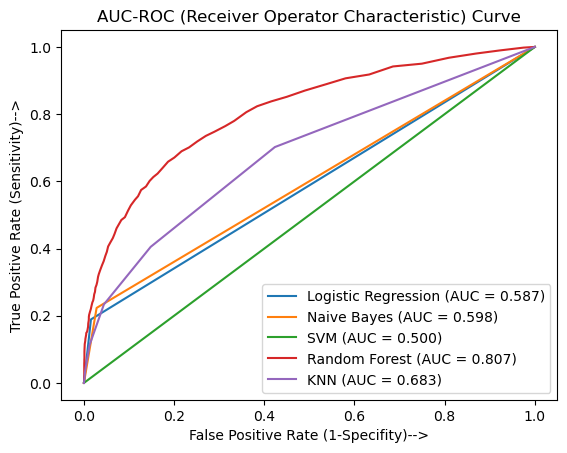

In [27]:
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {auc_nb:.3f})")
plt.plot(svc_fpr, svc_tpr, label=f"SVM (AUC = {auc_svc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {auc_knn:.3f})")

plt.xlabel("False Positive Rate (1-Specifity)-->")
plt.ylabel("True Positive Rate (Sensitivity)-->")
plt.title("AUC-ROC (Receiver Operator Characteristic) Curve")

plt.legend();

In [31]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, y_pred_lr)
auc_lr = auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, nb_threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc)
auc_svc = auc(svc_fpr, svc_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

auc_lr, auc_nb, auc_svc, auc_rf, auc_knn

(0.5867337113346964,
 0.5975937417320484,
 0.5,
 0.6263879668535471,
 0.5947041823523097)

In [28]:
knn_pp = knn.predict_proba(X_test)
type(knn_pp)

numpy.ndarray

In [31]:
len(knn_pp), len(X_test)

(5665, 5665)

In [34]:
knn_pp[:5, 1]

array([0.4, 0. , 0.4, 0. , 0.4])

In [14]:
%%time
svc_2 = SVC(probability=True)
svc_2.fit(X_train, y_train)
print(svc_2.score(X_test, y_test))

0.830008826125331
Wall time: 4min 23s


In [45]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
auc_lr = auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, nb_threshold = roc_curve(y_test, nb.predict_proba(X_test)[:,1], pos_label=1)
auc_nb = auc(nb_fpr, nb_tpr)

svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_2.predict_proba(X_test)[:,1], pos_label=1)
auc_svc = auc(svc_fpr, svc_tpr)

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=1)
auc_rf = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
auc_knn = auc(knn_fpr, knn_tpr)

auc_lr, auc_nb, auc_svc, auc_rf, auc_knn

(0.7605068963826622,
 0.7346572214912194,
 0.7454451454121509,
 0.8097377311879393,
 0.6825009397030847)

0.19


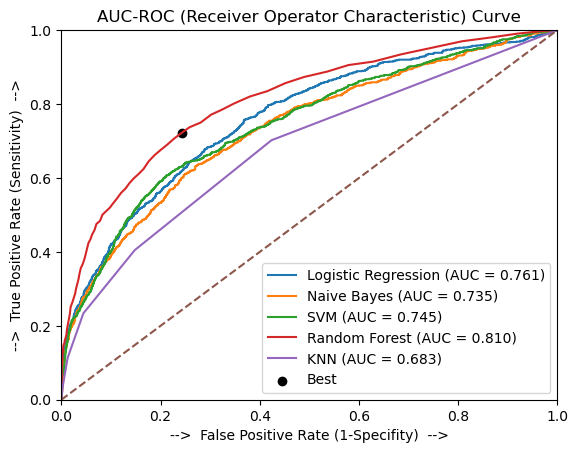

In [46]:
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {auc_nb:.3f})")
plt.plot(svc_fpr, svc_tpr, label=f"SVM (AUC = {auc_svc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot([0, 1], ls="--")

J = rf_tpr - rf_fpr
ix = np.argmax(J)
best_thresh = rf_threshold[ix]
print(best_thresh)
plt.scatter(rf_fpr[ix], rf_tpr[ix], marker='o', color='black', label='Best')

plt.xlabel("-->  False Positive Rate (1-Specifity)  -->")
plt.ylabel("-->  True Positive Rate (Sensitivity)  -->")
plt.title("AUC-ROC (Receiver Operator Characteristic) Curve")

plt.xlim((0,1))
plt.ylim((0,1))
plt.legend();

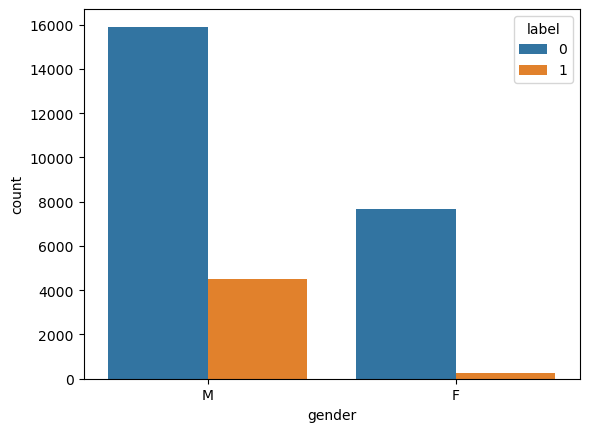

In [42]:
sns.countplot(x="gender", hue="label", data=train);

In [37]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)

In [23]:
type(lr_fpr), type(lr_threshold)

(numpy.ndarray, numpy.ndarray)

In [27]:
len(lr_fpr), len(lr_threshold), len(X_test)

(1296, 1296, 5665)

In [38]:
lr_fpr[:5], lr_tpr[:5]

(array([0.        , 0.        , 0.        , 0.00021268, 0.00021268]),
 array([0.        , 0.00103842, 0.05399792, 0.05399792, 0.0623053 ]))

In [39]:
lr_threshold[:5]

array([1.98636778, 0.98636778, 0.82767457, 0.82671358, 0.81675036])

In [41]:
lr_threshold[1290:]

array([0.01697292, 0.01433615, 0.01416175, 0.01379333, 0.01312913,
       0.00544043])